### 특징 데이터(x), feature와 정답 데이터(y, target) 데이터 분할
1. feature(x), target(y)
2. 학습 데이터(train_X, train_Y), 테스트 데이터(test_x)
3. test_y : 성능 평가시 predict_y와 비교 평가

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./data/titanic_clean.csv")
data["Pclass"] = data.Pclass.astype(int)
data["Age"] = data.Age.astype(int)
eda = data.loc[:,'PassengerId': 'Embarked']

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [5]:
# 머신러닝에 사용할 특징 데이터 추출
features = ["Pclass","Sex_num","Age",'Fare',"E_C","E_Q","E_S"]
data_X = data[features]
data_X

data_Y = data["Survived"]

In [6]:
# train_data와 test_data 분할하기
from sklearn.model_selection import train_test_split

##### train_test_split
- 순서 중요 : x_train,x_test,y_train,y_test = train_test_split(data_x,data_y)
- option :
    - test_size = 0.25(default)
    - shuffle = True(default)
    - random_state : 랜덤시드값(42 : default)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data_X,data_Y, test_size = 0.2)

In [8]:
print(y_train.shape, x_train.shape)

(712,) (712, 7)


In [9]:
x_train["Pclass"].value_counts()

3    379
1    176
2    157
Name: Pclass, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data_X,data_Y, test_size = 0.2, random_state=20)

In [11]:
x_train["Pclass"].value_counts()

3    381
1    176
2    155
Name: Pclass, dtype: int64

### 머신러닝 모델 학습하기
- SGD(Stochastic Gradient Desscent) : 확률적 경사 하강법

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
# 분류 모형 생성
model_sgdc = SGDClassifier()

In [14]:
# 모델 학습
model_sgdc.fit(x_train,y_train)

SGDClassifier()

In [15]:
# 모형 예측
y_pred = model_sgdc.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1], dtype=int64)

#### 성능평가

In [16]:
# 모형 예측률
(y_pred == y_test).mean()

## 이렇게만 하면 문제가 생길 수 있다.

0.664804469273743

In [17]:
from sklearn.metrics import accuracy_score
print(f'예측 정확도 : {accuracy_score(y_pred,y_test)}')

예측 정확도 : 0.664804469273743


In [21]:
# 정밀도(precision), 재현율(recall), 정확도(accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.87      0.67        70
           1       0.87      0.53      0.66       109

    accuracy                           0.66       179
   macro avg       0.71      0.70      0.66       179
weighted avg       0.74      0.66      0.66       179



### 학습모델(최적의 가설함수 찾을때 각 파라미터(최소 error값)는??)
- w(기울기),b(절편) 

In [27]:
model_sgdc.coef_.shape

(1, 7)

In [31]:
# 각 피처에 대한 기울기값
model_sgdc.coef_

array([[ -70.21650088, -541.51816586,  -11.17080696,   74.8651524 ,
          59.04569392,   68.62067131,  -34.04436406]])

In [29]:
# 절편값
model_sgdc.intercept_

array([211.13900293])

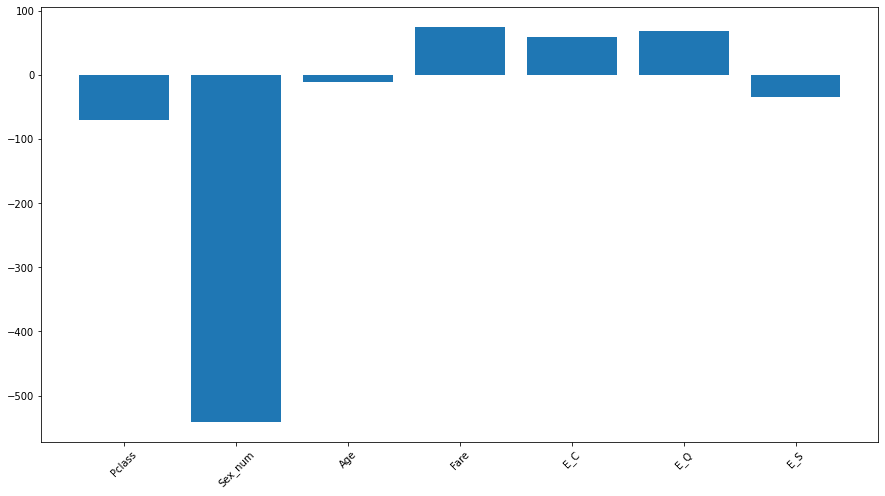

In [36]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(x_train.columns, model_sgdc.coef_[0,:])
plt.xticks(rotation=45)
plt.show()

##### Quiz(예습)
- titanic 생존자 예측문제 DecisionTreeClassfier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
# 데이터
features = ["Pclass","Sex_num","Age",'Fare',"E_C","E_Q","E_S"]
data_x = data[features]
data_x
data_y = data["Survived"]

# train,test 데이터 만들기
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y, test_size = 0.2, random_state = 42)

# 모델 만들기
model_dtc = DecisionTreeClassifier()

# 모델 적용
model_dtc.fit(x_train,y_train)

# 예측하기
y_pred = model_dtc.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [17]:
# 성능평가
print((y_pred == y_test).mean())
print(model_dtc.score(x_test,y_test))
print("-"*80 )

# classification_report
print(classification_report(y_pred,y_test))

0.7374301675977654
0.7374301675977654
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       104
           1       0.69      0.68      0.68        75

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



,1,2,3
Pclass,215,191,485
